# Instalação das bibliotecas:
- Paddle OCR - biblioteca para leitura de palavras em imagem.
- Opencv - biblioteca para trabalhar com imagens e camera.
- Symspellpy e SpellChecker - biblioteca para corrigir strings, a partir de uma base de dados.

In [2]:
!python -m pip install paddlepaddle==2.2.2 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


You should consider upgrading via the 'C:\Users\cinth\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install paddleocr
!python -m pip install -U symspellpy
!pip install pyspellchecker
!pip install opencv-python

You should consider upgrading via the 'C:\Users\cinth\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cinth\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cinth\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cinth\anaconda3\python.exe -m pip install --upgrade pip' command.


# Importação de bibliotecas

In [4]:
import pandas as pd
import cv2 
import os
import numpy as np
import codecs
from paddleocr import PaddleOCR, draw_ocr 
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
from symspellpy import SymSpell, Verbosity
from itertools import islice
from PIL import Image
from spellchecker import SpellChecker
from collections import Counter
import re
import copy

[2022/08/01 10:18:48] matplotlib DEBUG: (private) matplotlib data path: C:\Users\cinth\anaconda3\lib\site-packages\matplotlib\mpl-data
[2022/08/01 10:18:48] matplotlib DEBUG: matplotlib data path: C:\Users\cinth\anaconda3\lib\site-packages\matplotlib\mpl-data
[2022/08/01 10:18:48] matplotlib DEBUG: CONFIGDIR=C:\Users\cinth\.matplotlib
[2022/08/01 10:18:48] matplotlib DEBUG: matplotlib version 3.3.4
[2022/08/01 10:18:48] matplotlib DEBUG: interactive is False
[2022/08/01 10:18:48] matplotlib DEBUG: platform is win32
[2022/08/01 10:18:48] matplotlib DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', 'encodings.cp1252', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins'

[2022/08/01 10:18:48] matplotlib DEBUG: CACHEDIR=C:\Users\cinth\.matplotlib
[2022/08/01 10:18:48] matplotlib.font_manager DEBUG: Using fontManager instance from C:\Users\cinth\.matplotlib\fontlist-v330.json
[2022/08/01 10:18:49] matplotlib.pyplot DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
[2022/08/01 10:18:49] matplotlib.pyplot DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.


<b> - Configura spell checker e OCR para portugues ("pt").<b>

In [5]:
spell_pt = SpellChecker(language='pt') 
ocr_model = PaddleOCR(lang='pt')

Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\cinth/.paddleocr/2.4\\ocr\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='box', det_pse_scale=1, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\cinth/.paddleocr/2.4\\ocr\\rec\\latin\\latin_ppocr_mobile_v2.0_rec_infer', rec_image_shape='3, 32, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='C:\\Users\\cinth\\anaconda3\\lib\\site-packages\\paddleocr\\ppocr\\utils\\dict\\latin_d

- <b> Carrega os dados arquivo de nomes, utilizando a biblioteca pandas em formato txt covertendo para csv, utilizando a primeira linha como nome da coluna. <b>

In [251]:
lista_nomes = pd.read_fwf('lista_nomes_sobrenomes.txt')
lista_nomes.to_csv('base_dados_br.csv')

- <b> Função .tolist para converter o data frame para uma lista.
- <b> Função .sort para organizar os dados em ordem alfabetica.

In [252]:
Lista_nomes = lista_nomes['Nomes'].tolist()
lista = Lista_nomes.sort()

- <b>Criando um dictionary com sym_spell, para correção de nomes retornados com erro.

In [253]:
sym_spell = SymSpell()
dictionary = [sym_spell.create_dictionary_entry(word,1) for word in Lista_nomes]

- <b>cv2.imread ler imagens 

In [119]:
image1 = cv2.imread('CNH_fake.jpg')
image2 = cv2.imread('Rg_fake.png')

- <b>Redimensionamento da imagem:

In [10]:
cnh= cv2.resize(image1,(800,600)) 
rg= cv2.resize(image2,(800,600)) 

- <b> Convertendo a imagem para escala de cinza

In [11]:
img1=cv2.cvtColor(cnh,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(rg,cv2.COLOR_BGR2GRAY)

- <b>Plotando imagem através da biblioteca matplotlib.

[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf)

[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'SimSun' (simsun.ttc) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal 300 normal>) = 10.145
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Sitka' (SitkaVF-Italic.ttf) italic normal 400 normal>) = 11.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
[2022/08/01 10:19:15] matplotlib

[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Arial' (arialbd.ttf) normal normal 700 normal>) = 6.698636363636363
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal 290 normal>) = 10.1545
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Segoe UI Symbol' (seguisym.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] mat

[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 700 normal>) = 10.335
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Ink Free' (Inkfree.ttf) normal normal 400 normal>) = 10.05
[2022/08/01 10:19:15] matplotlib.font_manager DEBUG: findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
[2022/08/01 10:19:15] matplotlib.font_ma

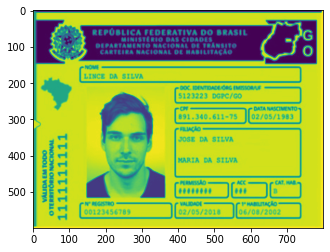

In [12]:
plt.imshow(img1)

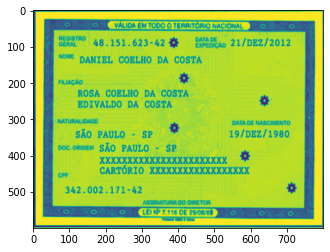

In [13]:
plt.imshow(img2)

- <b>Função para passar paddle_ocr nas imagens tratadas

- Abaixo utilizo a imagem tratada em escala de cinza, pois apresentou melhor resultado com o paddle_ocr ('img1).
- A principal dificuldade em utilizar imagens para passar o ocr, depende muito da iluminação utilizada, qualidade da imagem, tudo isso deve ser levado em conta, ou não apresentará uma leitura correta das strings em relação a imagem original.

In [203]:
result = ocr_model.ocr(img1) 
boxes = [res[0] for res in result] 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

[2022/08/01 15:04:35] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/08/01 15:04:36] root DEBUG: dt_boxes num : 27, elapse : 0.7525370121002197
[2022/08/01 15:04:37] root DEBUG: rec_res num  : 27, elapse : 1.5205187797546387


- Paddle ocr é interessante, pois ele divide a imagem em:
- Boxes (informando a posição em pixels onde o texto foi encontrado).
- Texts (filtra somente o texto).
- Scores (informa a acurácia do texto).
- Result exibe todas as informações como exemplifica abaixo.

In [15]:
print(result)

[[[[164.0, 53.0], [588.0, 53.0], [588.0, 70.0], [164.0, 70.0]], ('REPUBLICAFEDERATIVADOBRASIL', 0.96832913)], [[[243.0, 73.0], [494.0, 74.0], [494.0, 88.0], [243.0, 87.0]], ('MINISTERIODASCIDADES', 0.9952122)], [[[173.0, 91.0], [559.0, 91.0], [559.0, 105.0], [173.0, 105.0]], ('DIPARTASCNTONACIONALDETRANSITO', 0.9180689)], [[[188.0, 109.0], [551.0, 109.0], [551.0, 122.0], [188.0, 122.0]], ('CARTLILANACIONALDLHADILITAGAO', 0.8893867)], [[[139.0, 151.0], [180.0, 149.0], [181.0, 163.0], [140.0, 165.0]], ('NOMF', 0.842741)], [[[136.0, 174.0], [304.0, 174.0], [304.0, 190.0], [136.0, 190.0]], ('LINCEDASILVA', 0.9929773)], [[[404.0, 206.0], [630.0, 206.0], [630.0, 220.0], [404.0, 220.0]], ('0OCIDINTOVDIORGINTTORUS', 0.73118573)], [[[400.0, 228.0], [576.0, 228.0], [576.0, 245.0], [400.0, 245.0]], ('5123223DGPC/GO', 0.990863)], [[[606.0, 263.0], [735.0, 266.0], [735.0, 279.0], [606.0, 277.0]], ('DATANASCIMENTO', 0.8873496)], [[[399.0, 284.0], [562.0, 283.0], [562.0, 301.0], [399.0, 302.0]], ('89

In [16]:
print(texts)

['REPUBLICAFEDERATIVADOBRASIL', 'MINISTERIODASCIDADES', 'DIPARTASCNTONACIONALDETRANSITO', 'CARTLILANACIONALDLHADILITAGAO', 'NOMF', 'LINCEDASILVA', '0OCIDINTOVDIORGINTTORUS', '5123223DGPC/GO', 'DATANASCIMENTO', '891.340.611-79', '02/05/1983', 'FLIACKO', 'JOSEDASILVA', 'LLLLLLLE', 'MARIADASILVA', 'HAVSLO', 'MOOS', 'N-PRGISIRO', "1'HABRUTACto", '02/05/2018', '00123456789', '06/08/2002']


- Para leitura da imagem do rg, utilizo o tratamento em escala de cinza, pois apresentou melhores resultados em relação a esse tipo de imagem.
- O tratamento da imagem deve ser levado em consideração, conforme a qualidade da imagem original, pois poderá apresentar leitura com informações inconclusivas.

In [17]:
result_rg = ocr_model.ocr(img2) 
boxes_rg = [resu[0] for resu in result_rg] 
texts_rg = [resu[1][0] for resu in result_rg]
scores_rg = [resu[1][1] for resu in result_rg]

[2022/08/01 10:19:24] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/08/01 10:19:25] root DEBUG: dt_boxes num : 31, elapse : 0.6098237037658691
[2022/08/01 10:19:26] root DEBUG: rec_res num  : 31, elapse : 1.3649287223815918


In [18]:
print(texts_rg)

['VALIOAEMTODOOTERRITORIONACIONAL', 'e', 'REGISTRO', '48.151.623-42', 'OATADE', 'GERAL', '21/DEZ/2012', 'NOME', 'DANIELCOELHODACOSTA', 'FILIACAO', 'ROSACOELHODACOSTA', 'EDIVALDODACOSTA', 'NATURALIDADE', 'DaTadeNASCIMENTO', 'SAOPAULO-SP', '19/DEZ/1980', 'DOC.ORICEMSAOPAULO-SP', 'MOOLOOCOOOCOOOOOOOOOOO', 'GARTORIOXXXXXXXXXXXXXXXXXX', 'CPI', '342.002.171-42', 'ASSNATURADODIRETOR', 'LEIN?7.1160E29/0086']


- Abaixo utilizo o código para exibir o tipo da estrura, o paddle ocr nos retorna uma lista.

In [22]:
print(type(texts_rg))

<class 'list'>


- Para filtrar os dados, converto a estrutura de "list" para "string"

In [19]:
texts_rg_str=''.join(texts_rg)
print(texts_rg_str)

VALIOAEMTODOOTERRITORIONACIONALeREGISTRO48.151.623-42OATADEGERAL21/DEZ/2012NOMEDANIELCOELHODACOSTAFILIACAOROSACOELHODACOSTAEDIVALDODACOSTANATURALIDADEDaTadeNASCIMENTOSAOPAULO-SP19/DEZ/1980DOC.ORICEMSAOPAULO-SPMOOLOOCOOOCOOOOOOOOOOOGARTORIOXXXXXXXXXXXXXXXXXXCPI342.002.171-42ASSNATURADODIRETORLEIN?7.1160E29/0086


In [167]:
texts_cnh_str=''.join(texts)
print(texts_cnh_str)

REPUBLICAFEDERATIVADOBRASILMINISTERIODASCIDADESDIPARTASCNTONACIONALDETRANSITOCARTLILANACIONALDLHADILITAGAONOMFLINCEDASILVA0OCIDINTOVDIORGINTTORUS5123223DGPC/GODATANASCIMENTO891.340.611-7902/05/1983FLIACKOJOSEDASILVALLLLLLLEMARIADASILVAHAVSLOMOOSN-PRGISIRO1'HABRUTACto02/05/20180012345678906/08/2002


In [165]:
print(type(texts_rg_str))
print(type(texts_cnh_str))

<class 'str'>
<class 'str'>


- Busca número de CPF na string
- Regex para filtrar o resultado

In [198]:
cpf = re.search("[0-9]{3}[.]?[0-9]{3}[.]?[0-9]{3}[-]?[0-9]{2}",texts_rg_str)
cpf_rg = cpf.group()
print(f'CPF_cnh: {cpf.group()}\n')

CPF_cnh: 342.002.171-42



In [199]:
y = re.search('[0-9]{3}[.]?[0-9]{3}[.]?[0-9]{3}[-]?[0-9]{2}',texts_cnh_str)
cpf_cnh = y.group()
print(f'CPF: {y.group()}\n')

CPF: 891.340.611-79



In [197]:
data_nasc = re.search('\d{2}\/\d{2}\/\d{4}',texts_cnh_str)
nasc_cnh = cat.group()
print(f'Data de Nascimento: {data_nasc.group()}\n')

Data de Nascimento: 02/05/1983



- Buscar resultado a partir da posição:

In [80]:
rg = result_rg[3][1][0]
print(f'RG:{rg}')

RG:48.151.623-42


In [163]:
data_ex = result_rg[6][1][0]
print(f'Data de Expedição:{data_ex}')

data_nasc = result_rg[15][1][0]
print(f'Data de Nascimento: {data_nasc}')

cidade = result_rg[14][1][0]
print(f'Naturalidade: {cidade}')

Data de Expedição:21/DEZ/2012
Data de Nascimento: 19/DEZ/1980
Naturalidade: SAOPAULO-SP
Naturalidade: 48.151.623-42


In [131]:
nome = result_rg[8][1][0]
print(f'Nome: {nome}')

Nome: DANIELCOELHODACOSTA


In [256]:
nome_cnh = result[5][1][0]
print(nome_cnh)

LINCEDASILVA


In [227]:
fili_cnh = result[12][1][0]
fili_cnh_1 = result[14][1][0]
print(f'Filiação_cnh:\n{fili_cnh}\n{fili_cnh_1}')

Filiação_cnh:
JOSEDASILVA
MARIADASILVA


In [98]:
filiac = result_rg[10][1][0]
filiac_1 = result_rg[11][1][0]
print(f'Filiação: \n{filiac}\n{filiac_1}')

Filiação: 
ROSACOELHODACOSTA
EDIVALDODACOSTA


# Para correção dos nomes: 
- função compound da biblioteca symspell para organizar o nome com espaços.
- Função word_segmentation symspell para se basear no banco de dados de nomes e sobrenomes

In [255]:
sugestions_fili= sym_spell.lookup_compound(filiac,max_edit_distance=1)
correto_fili=sugestions_fili[0]._term
suggestions_filiac = sym_spell.word_segmentation(filiac)

sugestions_fili_1= sym_spell.lookup_compound(filiac_1,max_edit_distance=1)
correto_fili_1=sugestions_nome[0]._term

suggestions_fili_1 = sym_spell.word_segmentation(filiac_1)

In [134]:
sugestions_nome= sym_spell.lookup_compound(nome,max_edit_distance=1)
correto_nome=sugestions_nome[0]._term
suggestions_nome = sym_spell.word_segmentation(nome)

In [142]:
print (f'Nome:\n{suggestions_nome.corrected_string}\n')
print (f'Filiação:\n{suggestions_filiac.corrected_string}\n{suggestions_fili_1.corrected_string}')

Nome:
Daniel Coelho Da Costa

Filiação:
Rosa Coelho Da Costa
Edivaldo Da Costa


In [268]:
sugestions_fili_cnh= sym_spell.lookup_compound(fili_cnh,max_edit_distance=1)
correto_fili_cnh=sugestions_fili_cnh[0]._term
suggestions_fili_cn = sym_spell.word_segmentation(fili_cnh)

sugestions_fili_cnh_1= sym_spell.lookup_compound(fili_cnh_1,max_edit_distance=1)
correto_fili_1_cnh=sugestions_nome[0]._term

suggestions_fili_1 = sym_spell.word_segmentation(fili_cnh_1)

In [247]:
sugestions_nome_cnh= sym_spell.lookup_compound(nome_cnh,max_edit_distance=1)
correto_nome_cnh=sugestions_nome_cnh[0]._term
suggestions_nome_cn = sym_spell.word_segmentation(nome_cnh)

In [271]:
print (f'Nome:\n{suggestions_nome_cn}\n')
print(f'Filiação:\n{suggestions_fili_1.corrected_string}\n{suggestions_fili_cn.corrected_string}')

Nome:
Composition(segmented_string='LINCE DASILVA', corrected_string='Alice Dasilva', distance_sum=4, log_prob_sum=-23.54424873788034)

Filiação:
Mariada Silva
Jose Dasilva
